# Car Price Prediction in Jordan

## Data Analysis and preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("copy.csv",encoding='latin-1')
df.head()

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Without Customs,Hybrid,"1,000 - 1,999 cc",Cash Only,"17,500 JOD"
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,"18,900 JOD"
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",With Customs,Hybrid,NaN,Cash Only,"11,500 JOD"
3,BMW,530,2017,Automatic,"120,000 - 129,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,"31,900 JOD"
4,Toyota,Cross,2021,Automatic,"40,000 - 49,999",With Customs,Hybrid,"1,000 - 1,999 cc",Cash or Installments,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14099 entries, 0 to 14098
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car_make        14070 non-null  object
 1   model           14070 non-null  object
 2   year            14059 non-null  object
 3   transmition     14058 non-null  object
 4   kilometers      14058 non-null  object
 5   car_customs     14058 non-null  object
 6   fuel            14058 non-null  object
 7   engine_size     12191 non-null  object
 8   payment method  14058 non-null  object
 9   price           10688 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [ ]:
df.shape

(14099, 10)

In [ ]:
df["year"].unique()

array(['2021', '2013', '2012', '2017', '2023', '2015', '2020', '2014',
       '2022', '2009', '2011', '2010', '2008', '2019', '2018', '2004',
       '2000', '2007', '2005', '2016', '2024', '2006', '2003', '1991',
       '1998', '2002', '1992', '1990', '2001', '1996', nan, '1999',
       '1984', '1971', '1997', '1987', '1986', '1993', '1982', '1995',
       '1988', '1994', '1976', '1983', '1980', '1985', '1989', '1981',
       'Older than 1970', '1977', '1975', '1973', '1974', '1979', '1970',
       '1978', '1972'], dtype=object)

In [ ]:
df[df["year"]=="Older than 1970"]

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
4969,Volkswagen,Beetle,Older than 1970,Manual,"90,000 - 99,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,"101,010 JOD"
13567,Chrysler,New Yorker,Older than 1970,Automatic,"50,000 - 59,999",Without Customs,Gasoline,NaN,Cash Only,"10,000 JOD"


In [ ]:
df["year"] = df["year"].replace("Older than 1970","1970")
df["year"].unique()

array(['2021', '2013', '2012', '2017', '2023', '2015', '2020', '2014',
       '2022', '2009', '2011', '2010', '2008', '2019', '2018', '2004',
       '2000', '2007', '2005', '2016', '2024', '2006', '2003', '1991',
       '1998', '2002', '1992', '1990', '2001', '1996', nan, '1999',
       '1984', '1971', '1997', '1987', '1986', '1993', '1982', '1995',
       '1988', '1994', '1976', '1983', '1980', '1985', '1989', '1981',
       '1970', '1977', '1975', '1973', '1974', '1979', '1978', '1972'],
      dtype=object)

In [ ]:
df.isnull().sum()

car_make            29
model               29
year                40
transmition         41
kilometers          41
car_customs         41
fuel                41
engine_size       1908
payment method      41
price             3411
dtype: int64

In [ ]:
nan_rows_in_years = df[pd.isna(df["year"])]
print(nan_rows_in_years)

            car_make   model year transmition kilometers car_customs fuel  \
935              NaN     NaN  NaN         NaN        NaN         NaN  NaN   
2610             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
2780             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
2787      Mitsubishi  Lancer  NaN         NaN        NaN         NaN  NaN   
3114   Mercedes Benz   E 200  NaN         NaN        NaN         NaN  NaN   
3422             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
4053         Hyundai  Avante  NaN         NaN        NaN         NaN  NaN   
4147             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
4225   Mercedes Benz   C 200  NaN         NaN        NaN         NaN  NaN   
4450             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
5954             NaN     NaN  NaN         NaN        NaN         NaN  NaN   
7151             NaN     NaN  NaN         NaN        NaN         NaN  NaN   

In [ ]:
df["car_make"].unique()

array(['Toyota', 'Mercedes Benz', 'Lexus', 'BMW', 'GMC', 'Mitsubishi',
       'Hyundai', 'Honda', 'Tesla', 'Ford', 'Audi', 'Kia', 'Land Rover',
       'Nissan', 'Chevrolet', 'SEAT', 'Changan', 'Volkswagen', 'Mazda',
       'Infiniti', 'Isuzu', 'GAC', 'Porsche', 'Lincoln', 'Peugeot',
       'Jeep', 'MG', 'Other', 'BYD', 'MINI', 'Saab', 'Opel', 'Dodge',
       'Citroen', 'Dongfeng', 'Chery', 'Great Wall', 'Haval', 'Fiat',
       'Bestune', 'JMC', 'NETA', 'Suzuki', 'Cadillac', 'Daihatsu',
       'Renault', 'Jac', 'Skywell', 'BAIC', nan, 'Samsung', 'Leapmotor',
       'Daewoo', 'CMC', 'Smart', 'Volvo', 'Mahindra', 'Polestar', 'TATA',
       'Hummer', 'Rover', 'Chrysler', 'Hongqi', 'Geely', 'Jaguar', 'Lada',
       'Skoda', 'Subaru', 'Hunaghai', 'Proton', 'Lancia', 'Aston Martin',
       'Iveco', 'Pontiac', 'SsangYong', 'Dayun', 'Higer'], dtype=object)

In [ ]:
df[df["car_make"]=="Other"]

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
173,Other,Other,2021,Automatic,0,With Customs,Electric,70 - 89 kWh,Cash Only,"29,500 JOD"
1854,Other,Other,2021,Automatic,0,With Customs,Electric,70 - 89 kWh,Cash Only,"29,500 JOD"
4556,Other,Other,2023,Automatic,"10,000 - 19,999",Without Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,"12,000 JOD"
5940,Other,Other,1973,Manual,0,With Customs,Gasoline,0 - 499 cc,Installments Only,NaN
6778,Other,Other,2022,Automatic,0,With Customs,Electric,Less than 50 kWh,Cash Only,"6,000 JOD"
10563,Other,Other,2023,Automatic,0,With Customs,Electric,70 - 89 kWh,Cash or Installments,NaN
10603,Other,Other,1996,Manual,1 - 999,With Customs,Diesel,NaN,Cash Only,"1,500 JOD"
10621,Other,Other,2023,Automatic,0,With Customs,Electric,70 - 89 kWh,Cash or Installments,NaN


In [ ]:
# dropping car make and model equal to other
df = df[(df["car_make"]!="Other") & (df["model"]!="Other")]
# it works correctly

In [ ]:
df["payment method"].unique()

array(['Cash Only', 'Cash or Installments', 'Installments Only', nan],
      dtype=object)

In [ ]:
df["engine_size"].unique()

array(['1,000 - 1,999 cc', nan, 'More than 6,000 cc', '3,000 - 3,999 cc',
       '50 - 69 kWh', '2,000 - 2,999 cc', '90 - 99 kWh', '70 - 89 kWh',
       '4,000 - 4,999 cc', 'Less than 50 kWh', '5,000 - 5,999 cc',
       'More than 100 kWh', '500 - 999 cc', '0 - 499 cc'], dtype=object)

In [ ]:
df["fuel"].unique()

array(['Hybrid', 'Gasoline', 'Electric', 'Plug-in - Hybrid', 'Diesel',
       'Mild Hybrid', nan], dtype=object)

In [ ]:
df["transmition"].unique()

array(['Automatic', 'Manual', nan], dtype=object)

In [ ]:
df["model"].unique()

array(['Prius', 'C 180', 'CT 200', '530', 'Cross', 'Yukon', 'Pajero',
       'Prius C', 'Kona', 'E 200', 'e:NS1', 'Sonata', '3', 'Lancer',
       'Fusion', 'Q8 e-tron', 'Civic', 'RAV 4', 'Ioniq', 'Niro', 'LR4',
       'Range Rover Sport', 'Ioniq 5', 'Bolt', 'Sportage', 'Leone',
       'F-150', 'Insight', 'Leaf', 'E-Star', 'Prius+', 'Morning',
       'Porter', 'Optima K5', 'ID.6', 'Vito', 'Avante', 'C 350e', 'QX80',
       'E 350', 'Accord', 'Verna', 'GT-R', 'Menlo', 'Coaster', 'bZ4X',
       'E-Golf', 'X6', 'Ioniq 6', 'Elantra', 'ID.4', 'GLC 250', 'CLS 350',
       'C 200 Coupe', '6', 'Camry', 'NPR', 'D-Max', 'Hilux', 'Bongo',
       'Aion', 'GLE 350', 'Jetta', 'Land Cruiser', 'Pegas', 'X5',
       'Range Rover', 'Macan', 'K3', 'Genesis Coupe', 'MKZ', 'Corolla',
       '530e', 'Accent', 'e:NP1', 'Y', 'L200', '325', 'Mustang', 'i20',
       'Forte', 'C-MAX', 'CLA 45 AMG', '308', 'ES', 'Gladiator', 'MG HS',
       'Veloster', 'Focus', 'CX-30', 'CR-V', 'Defender 110', '735', 'Qin',
      

In [ ]:
len(df["model"].unique())

736

In [ ]:
df[df["model"]=="Fusion"]

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
14,Ford,Fusion,2015,Automatic,"200,000",With Customs,Hybrid,NaN,Cash Only,"13,000 JOD"
65,Ford,Fusion,2015,Automatic,"110,000 - 119,999",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"12,600 JOD"
77,Ford,Fusion,2019,Automatic,"70,000 - 79,999",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"16,800 JOD"
103,Ford,Fusion,2017,Automatic,"130,000 - 139,999",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"14,700 JOD"
117,Ford,Fusion,2017,Automatic,"100,000 - 109,999",With Customs,Hybrid,"1,000 - 1,999 cc",Cash Only,"16,800 JOD"
...,...,...,...,...,...,...,...,...,...,...
14017,Ford,Fusion,2018,Automatic,"140,000 - 149,999",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"14,800 JOD"
14022,Ford,Fusion,2019,Automatic,"70,000 - 79,999",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"15,500 JOD"
14044,Ford,Fusion,2011,Automatic,"200,000",With Customs,Hybrid,"2,000 - 2,999 cc",Cash Only,"10,250 JOD"
14058,Ford,Fusion,2013,Automatic,0,With Customs,Hybrid,"1,000 - 1,999 cc",Cash Only,"11,500 JOD"


In [ ]:
# convert year column to int data type excepting the errors and missing values
df["year"] = pd.to_numeric(df["year"],errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13886 entries, 0 to 14098
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car_make        13857 non-null  object
 1   model           13857 non-null  object
 2   year            13849 non-null  Int64 
 3   transmition     13848 non-null  object
 4   kilometers      13848 non-null  object
 5   car_customs     13848 non-null  object
 6   fuel            13848 non-null  object
 7   engine_size     12032 non-null  object
 8   payment method  13848 non-null  object
 9   price           10515 non-null  object
dtypes: Int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df["year"]

0        2021
1        2013
2        2012
3        2017
4        2021
         ... 
14094    2022
14095    1999
14096    2008
14097    2019
14098    1998
Name: year, Length: 13886, dtype: Int64

In [ ]:
len(df["kilometers"].unique())

24

In [ ]:
len(df["engine_size"].unique())

14

In [ ]:
df.shape

(13886, 10)

In [ ]:
# code to drop rows if all values of it are null
df = df.dropna(axis=0,how="all")
df.shape

(13857, 10)

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 8
transmition          9
kilometers           9
car_customs          9
fuel                 9
engine_size       1825
payment method       9
price             3342
dtype: int64

In [ ]:
df = df.dropna(subset=['year'])
df.shape

(13849, 10)

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 0
transmition          1
kilometers           1
car_customs          1
fuel                 1
engine_size       1817
payment method       1
price             3334
dtype: int64

In [ ]:
df[df["fuel"].isnull()]

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
9534,Kia,Lotze,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(subset=['fuel'])
df.shape

(13848, 10)

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 0
transmition          0
kilometers           0
car_customs          0
fuel                 0
engine_size       1816
payment method       0
price             3333
dtype: int64

In [ ]:
nulls_in_engine_size = df[df["engine_size"].isnull()]

In [ ]:
nulls_in_engine_size.head(20)

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",With Customs,Hybrid,NaN,Cash Only,"11,500 JOD"
14,Ford,Fusion,2015,Automatic,"200,000",With Customs,Hybrid,NaN,Cash Only,"13,000 JOD"
39,Toyota,Prius+,2020,Automatic,"30,000 - 39,999",With Customs,Hybrid,NaN,Installments Only,NaN
49,Mazda,3,2015,Automatic,"120,000 - 129,999",With Customs,Gasoline,NaN,Cash Only,"11,200 JOD"
50,Hyundai,Avante,2018,Automatic,"90,000 - 99,999",With Customs,Gasoline,NaN,Cash Only,"13,600 JOD"
51,Hyundai,Ioniq,2020,Automatic,"90,000 - 99,999",With Customs,Hybrid,NaN,Cash Only,"17,000 JOD"
92,Kia,Bongo,2023,Manual,0,With Customs,Diesel,NaN,Cash or Installments,NaN
114,Hyundai,Avante,2019,Automatic,"80,000 - 89,999",With Customs,Gasoline,NaN,Cash Only,NaN
136,Hyundai,Sonata,2018,Automatic,"100,000 - 109,999",With Customs,Hybrid,NaN,Cash Only,NaN
137,Toyota,Prius,2016,Automatic,0,With Customs,Hybrid,NaN,Cash Only,"10,400 JOD"


In [ ]:
df['price'] = df['price'].str.replace(' JOD', '').str.replace(',', '').astype('Int64')

<ipython-input-34-186df8d1a19b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(' JOD', '').str.replace(',', '').astype('Int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13848 entries, 0 to 14098
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car_make        13848 non-null  object
 1   model           13848 non-null  object
 2   year            13848 non-null  Int64 
 3   transmition     13848 non-null  object
 4   kilometers      13848 non-null  object
 5   car_customs     13848 non-null  object
 6   fuel            13848 non-null  object
 7   engine_size     12032 non-null  object
 8   payment method  13848 non-null  object
 9   price           10515 non-null  Int64 
dtypes: Int64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.head()

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Without Customs,Hybrid,"1,000 - 1,999 cc",Cash Only,17500
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,18900
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",With Customs,Hybrid,NaN,Cash Only,11500
3,BMW,530,2017,Automatic,"120,000 - 129,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,31900
4,Toyota,Cross,2021,Automatic,"40,000 - 49,999",With Customs,Hybrid,"1,000 - 1,999 cc",Cash or Installments,<NA>


In [ ]:
df["price"]

0        17500
1        18900
2        11500
3        31900
4         <NA>
         ...  
14094     <NA>
14095    11111
14096    12500
14097    36000
14098     2500
Name: price, Length: 13848, dtype: Int64

In [ ]:
brand_model_mean_prices = df.groupby(['car_make', 'model','year'])['price'].mean().reset_index()
len(brand_model_mean_prices)

3147

In [ ]:
brand_model_mean_prices = brand_model_mean_prices.dropna(subset=["price"])

In [ ]:
# assuring that mean is int
brand_model_mean_prices['price'] = brand_model_mean_prices['price'].astype(int)

In [ ]:
brand_model_mean_prices[brand_model_mean_prices["model"]=="Fusion"]

,car_make,model,year,price
643,Ford,Fusion,2010,10595
644,Ford,Fusion,2011,11027
645,Ford,Fusion,2012,10850
646,Ford,Fusion,2013,14312
647,Ford,Fusion,2014,11647
648,Ford,Fusion,2015,11689
649,Ford,Fusion,2016,12717
650,Ford,Fusion,2017,13693
651,Ford,Fusion,2018,14795
652,Ford,Fusion,2019,15180


In [ ]:
brand_model_mean_prices

,car_make,model,year,price
0,Aston Martin,Cygnet,1999,2800
3,Audi,A4,1996,3800
4,Audi,A4,2002,5500
5,Audi,A4,2005,7500
6,Audi,A4,2006,6500
...,...,...,...,...
3138,Volkswagen,Touareg,2011,16000
3139,Volkswagen,Transporter,2007,10500
3140,Volkswagen,Transporter,2008,3500
3142,Volkswagen,e-tharu,2020,2323


In [ ]:
len(brand_model_mean_prices)

2775

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 0
transmition          0
kilometers           0
car_customs          0
fuel                 0
engine_size       1816
payment method       0
price             3333
dtype: int64

In [ ]:
brand_model_mean_prices.isnull().sum()

car_make    0
model       0
year        0
price       0
dtype: int64

In [ ]:
for index, row in df.iterrows():
    if pd.isna(row['price']):  # Check if price is missing
        brand = row['car_make']
        model = row['model']
        year = row['year']
        mean_price = brand_model_mean_prices[(brand_model_mean_prices['car_make'] == brand) &
                                  (brand_model_mean_prices['model'] == model) &
                                  (brand_model_mean_prices['year'] == year)]['price'].values
        if len(mean_price) > 0:
            df.at[index, 'price'] = mean_price[0]

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 0
transmition          0
kilometers           0
car_customs          0
fuel                 0
engine_size       1816
payment method       0
price              555
dtype: int64

In [ ]:
missing_prices = df[df['price'].isnull()]
missing_prices

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
4,Toyota,Cross,2021,Automatic,"40,000 - 49,999",With Customs,Hybrid,"1,000 - 1,999 cc",Cash or Installments,<NA>
39,Toyota,Prius+,2020,Automatic,"30,000 - 39,999",With Customs,Hybrid,NaN,Installments Only,<NA>
48,Hyundai,Avante,2020,Automatic,"90,000 - 99,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash or Installments,<NA>
62,Nissan,GT-R,2012,Automatic,"20,000 - 29,999",With Customs,Gasoline,"3,000 - 3,999 cc",Cash Only,<NA>
69,Toyota,Coaster,2023,Manual,0,Without Customs,Diesel,"4,000 - 4,999 cc",Cash or Installments,<NA>
...,...,...,...,...,...,...,...,...,...,...
13908,Volkswagen,Golf,1987,Manual,"1,000 - 9,999",With Customs,Diesel,"1,000 - 1,999 cc",Cash or Installments,<NA>
13944,BMW,320,1997,Manual,0,With Customs,Gasoline,0 - 499 cc,Installments Only,<NA>
14031,Changan,V3,2021,Automatic,0,With Customs,Gasoline,NaN,Cash or Installments,<NA>
14036,Land Rover,Range Rover Vogue,2015,Automatic,1 - 999,With Customs,Gasoline,"5,000 - 5,999 cc",Installments Only,<NA>


In [ ]:
df = df.dropna(subset = ['price'])

In [ ]:
df.isnull().sum()

car_make             0
model                0
year                 0
transmition          0
kilometers           0
car_customs          0
fuel                 0
engine_size       1762
payment method       0
price                0
dtype: int64

In [ ]:
df.shape

(13293, 10)

In [ ]:
df.tail(10)

,car_make,model,year,transmition,kilometers,car_customs,fuel,engine_size,payment method,price
14089,Mitsubishi,Outlander,2006,Automatic,"200,000",With Customs,Gasoline,"2,000 - 2,999 cc",Cash Only,6300
14090,Mitsubishi,L200,1992,Manual,1 - 999,With Customs,Diesel,0 - 499 cc,Cash Only,3200
14091,Honda,Civic,2009,Automatic,1 - 999,With Customs,Gasoline,"More than 6,000 cc",Cash Only,8000
14092,Hyundai,Accent,1997,Manual,0,With Customs,Gasoline,NaN,Cash Only,10000
14093,Skoda,Fabia,2009,Manual,"190,000 - 199,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash or Installments,3800
14094,Toyota,C-HR,2022,Automatic,0,With Customs,Electric,50 - 69 kWh,Cash or Installments,18700
14095,Honda,Civic,1999,Automatic,"40,000 - 49,999",With Customs,Gasoline,"4,000 - 4,999 cc",Cash Only,11111
14096,Mercedes Benz,C 200,2008,Automatic,"180,000 - 189,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,12500
14097,Mercedes Benz,C 200,2019,Automatic,"40,000 - 49,999",With Customs,Mild Hybrid,"1,000 - 1,999 cc",Cash Only,36000
14098,Kia,Sportage,1998,Manual,"150,000 - 159,999",With Customs,Gasoline,"1,000 - 1,999 cc",Cash Only,2500


In [ ]:
df = df.drop(columns = ['car_customs','payment method'])
df.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc",17500
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",Gasoline,"1,000 - 1,999 cc",18900
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",Hybrid,NaN,11500
3,BMW,530,2017,Automatic,"120,000 - 129,999",Gasoline,"1,000 - 1,999 cc",31900
5,GMC,Yukon,2023,Automatic,"10,000 - 19,999",Gasoline,"More than 6,000 cc",115000


In [ ]:
len(df["car_make"].unique())

67

In [ ]:
len(df["model"].unique())

648

In [ ]:
len(df["year"].unique())

54

In [ ]:
unique_years = df["year"].unique().tolist()
unique_years

[2021,
 2013,
 2012,
 2017,
 2023,
 2015,
 2020,
 2014,
 2022,
 2009,
 2011,
 2010,
 2008,
 2019,
 2018,
 2004,
 2000,
 2007,
 2005,
 2016,
 2006,
 2003,
 1991,
 1998,
 2002,
 1992,
 2024,
 1990,
 2001,
 1996,
 1999,
 1971,
 1997,
 1987,
 1986,
 1993,
 1982,
 1995,
 1988,
 1994,
 1983,
 1980,
 1985,
 1984,
 1989,
 1976,
 1981,
 1970,
 1977,
 1975,
 1979,
 1978,
 1972,
 1973]

In [ ]:
unique_years.sort()

In [ ]:
unique_years

[1970,
 1971,
 1972,
 1973,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

### cars supported in the data set are from 1970 to 2024 except 1974.

In [ ]:
df["car_make"].unique()

array(['Toyota', 'Mercedes Benz', 'Lexus', 'BMW', 'GMC', 'Mitsubishi',
       'Hyundai', 'Honda', 'Tesla', 'Ford', 'Audi', 'Kia', 'Land Rover',
       'Chevrolet', 'SEAT', 'Nissan', 'Changan', 'Volkswagen', 'Mazda',
       'Infiniti', 'Isuzu', 'Porsche', 'Lincoln', 'Peugeot', 'Jeep',
       'BYD', 'Saab', 'Opel', 'Dodge', 'Citroen', 'Dongfeng', 'Chery',
       'Great Wall', 'Haval', 'Fiat', 'Cadillac', 'Suzuki', 'MG',
       'Daihatsu', 'Renault', 'BAIC', 'Samsung', 'Daewoo', 'Smart',
       'Mahindra', 'Polestar', 'Hummer', 'Chrysler', 'Jac', 'Volvo',
       'Geely', 'Jaguar', 'Lada', 'Skoda', 'Subaru', 'Hunaghai', 'MINI',
       'Proton', 'Lancia', 'Aston Martin', 'JMC', 'Pontiac', 'Leapmotor',
       'Skywell', 'SsangYong', 'Bestune', 'GAC'], dtype=object)

In [ ]:
df["model"].unique()

array(['Prius', 'C 180', 'CT 200', '530', 'Yukon', 'Pajero', 'Prius C',
       'Kona', 'E 200', 'e:NS1', 'Sonata', '3', 'Lancer', 'Fusion',
       'Q8 e-tron', 'Civic', 'RAV 4', 'Ioniq', 'Niro', 'LR4',
       'Range Rover Sport', 'Ioniq 5', 'Bolt', 'Sportage', 'Leone',
       'F-150', 'Insight', 'Leaf', 'E-Star', 'Morning', 'Porter',
       'Optima K5', 'ID.6', 'Vito', 'Avante', 'C 350e', 'QX80', 'E 350',
       'Accord', 'Verna', 'Menlo', 'bZ4X', 'E-Golf', 'X6', 'ID.4',
       'C 200 Coupe', 'Camry', 'NPR', 'D-Max', 'GLE 350', 'Jetta',
       'Land Cruiser', 'Pegas', 'Macan', 'K3', 'Genesis Coupe', 'MKZ',
       'Corolla', '530e', 'Accent', 'e:NP1', 'Y', 'L200', '325',
       'Mustang', 'i20', 'Forte', 'C-MAX', 'CLA 45 AMG', '308', 'ES',
       'Gladiator', 'Bongo', 'Veloster', 'Focus', 'Sylphy', 'Highlander',
       'Yaris', 'E2', '330', 'C 250', 'X', 'Tucson', 'E-Bora', '95',
       'EV6', 'Picanto', 'Kadett', 'Acadia', 'Spectra', 'E-lavida',
       'Terrain', 'i3', 'Rogue', 'Malibu

In [ ]:
df.isnull().sum()

car_make          0
model             0
year              0
transmition       0
kilometers        0
fuel              0
engine_size    1762
price             0
dtype: int64

### solving missing values in engine size column by seeing other cars that have the same car make, model and year

In [ ]:
for index, row in df.iterrows():
    if pd.isnull(row['engine_size']):
        # Find the engine size for cars with the same make, model, and year
        engine_sizes = df[(df['car_make'] == row['car_make']) &
                          (df['model'] == row['model']) &
                          (df['year'] == row['year'])]['engine_size']
        # Filter out NaN values
        engine_sizes = engine_sizes[~engine_sizes.isnull()]
        # If there are engine sizes available, use the first one to fill the missing value
        if not engine_sizes.empty:
            df.at[index, 'engine_size'] = engine_sizes.iloc[0]

In [ ]:
df.isnull().sum()

car_make         0
model            0
year             0
transmition      0
kilometers       0
fuel             0
engine_size    220
price            0
dtype: int64

In [ ]:
nulls = df[df["engine_size"].isnull()==True]
nulls

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
311,Citroen,C4,2016,Automatic,"130,000 - 139,999",Gasoline,NaN,9800
533,Toyota,C-HR,2019,Automatic,"30,000 - 39,999",Hybrid,NaN,20750
665,Land Rover,Range Rover Sport,2009,Automatic,"200,000",Gasoline,NaN,14000
984,Nissan,Murano,2008,Automatic,"130,000 - 139,999",Gasoline,NaN,7450
1075,Chevrolet,Camaro,1971,Automatic,"1,000 - 9,999",Gasoline,NaN,44000
...,...,...,...,...,...,...,...,...
13860,Land Rover,Defender,1998,Manual,"100,000 - 109,999",Gasoline,NaN,15000
13945,Skoda,Octavia,1996,Automatic,"190,000 - 199,999",Gasoline,NaN,1500
13965,Mitsubishi,Outlander,2009,Automatic,"70,000 - 79,999",Gasoline,NaN,9450
13998,Fiat,Stilo,2005,Manual,"200,000",Gasoline,NaN,11111


In [ ]:
df = df.dropna(subset=["engine_size"])
df.shape

(13073, 8)

In [ ]:
df.to_csv("cleaned_data2.csv",index=False)

In [ ]:
df[(df["car_make"]=="Hyundai")]

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
8,Hyundai,Kona,2020,Automatic,"20,000 - 29,999",Electric,50 - 69 kWh,18000
11,Hyundai,Sonata,2009,Automatic,"200,000",Gasoline,"2,000 - 2,999 cc",6800
19,Hyundai,Ioniq,2021,Automatic,"20,000 - 29,999",Hybrid,"1,000 - 1,999 cc",17475
21,Hyundai,Kona,2021,Automatic,"10,000 - 19,999",Electric,70 - 89 kWh,17625
28,Hyundai,Ioniq 5,2022,Automatic,"90,000 - 99,999",Electric,70 - 89 kWh,20314
...,...,...,...,...,...,...,...,...
14061,Hyundai,H-1 Starex,2005,Manual,0,Gasoline,0 - 499 cc,2950
14067,Hyundai,Tiburon,1997,Manual,"10,000 - 19,999",Gasoline,"1,000 - 1,999 cc",2500
14073,Hyundai,Avante,2006,Automatic,1 - 999,Gasoline,0 - 499 cc,5700
14080,Hyundai,H100,1999,Manual,1 - 999,Diesel,0 - 499 cc,5500


In [ ]:
final = df.copy()

## Visualization part

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

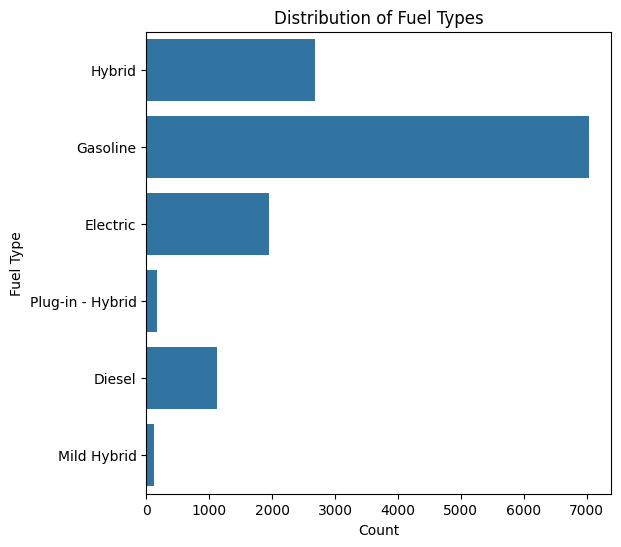

In [ ]:
# Fuel type distribution
plt.figure(figsize=(6, 6))
sns.countplot(y='fuel', data=df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

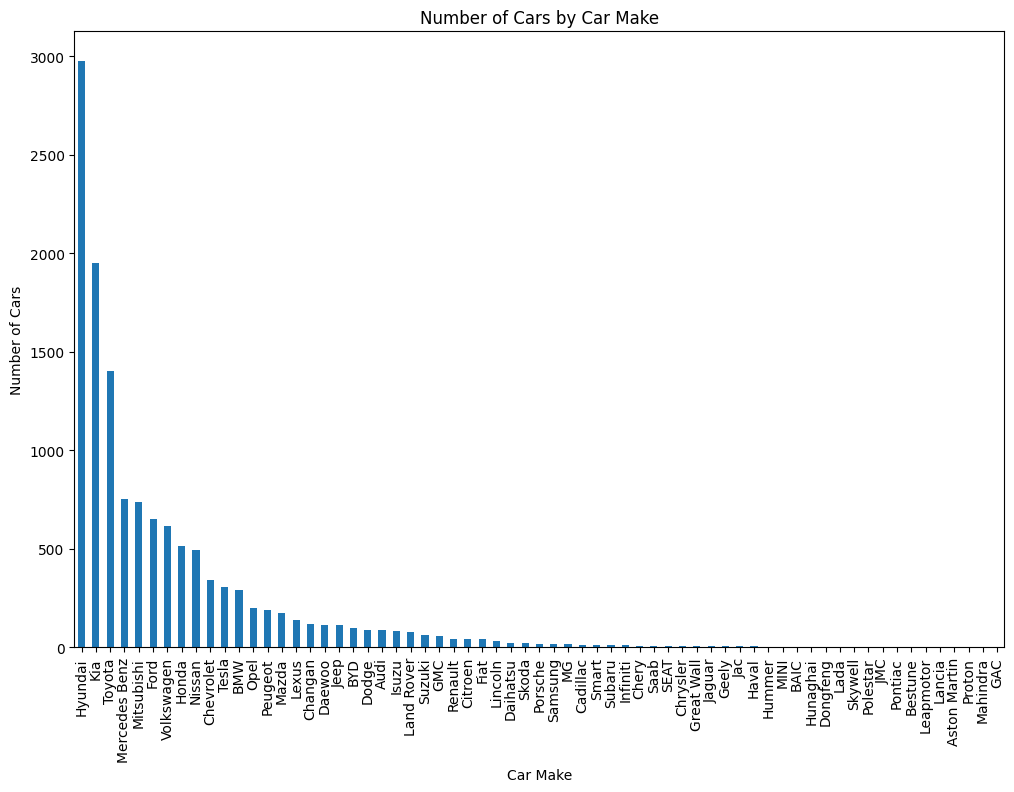

In [ ]:
plt.figure(figsize=(12, 8))
car_type_counts = df['car_make'].value_counts()
car_type_counts.plot(kind='bar')
plt.title('Number of Cars by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

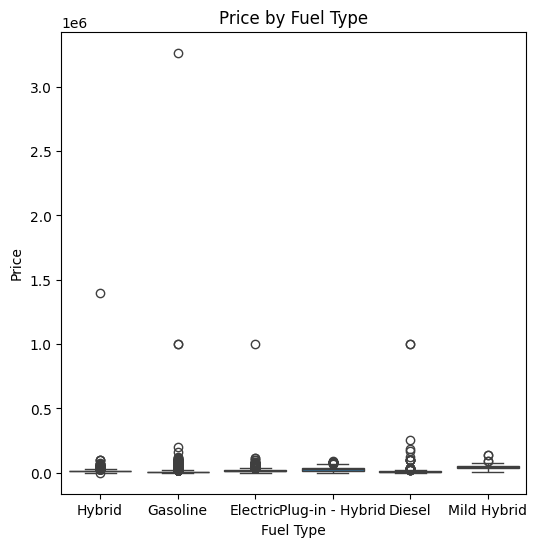

In [ ]:
# Box plot of Price by Fuel Type
plt.figure(figsize=(6, 6))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

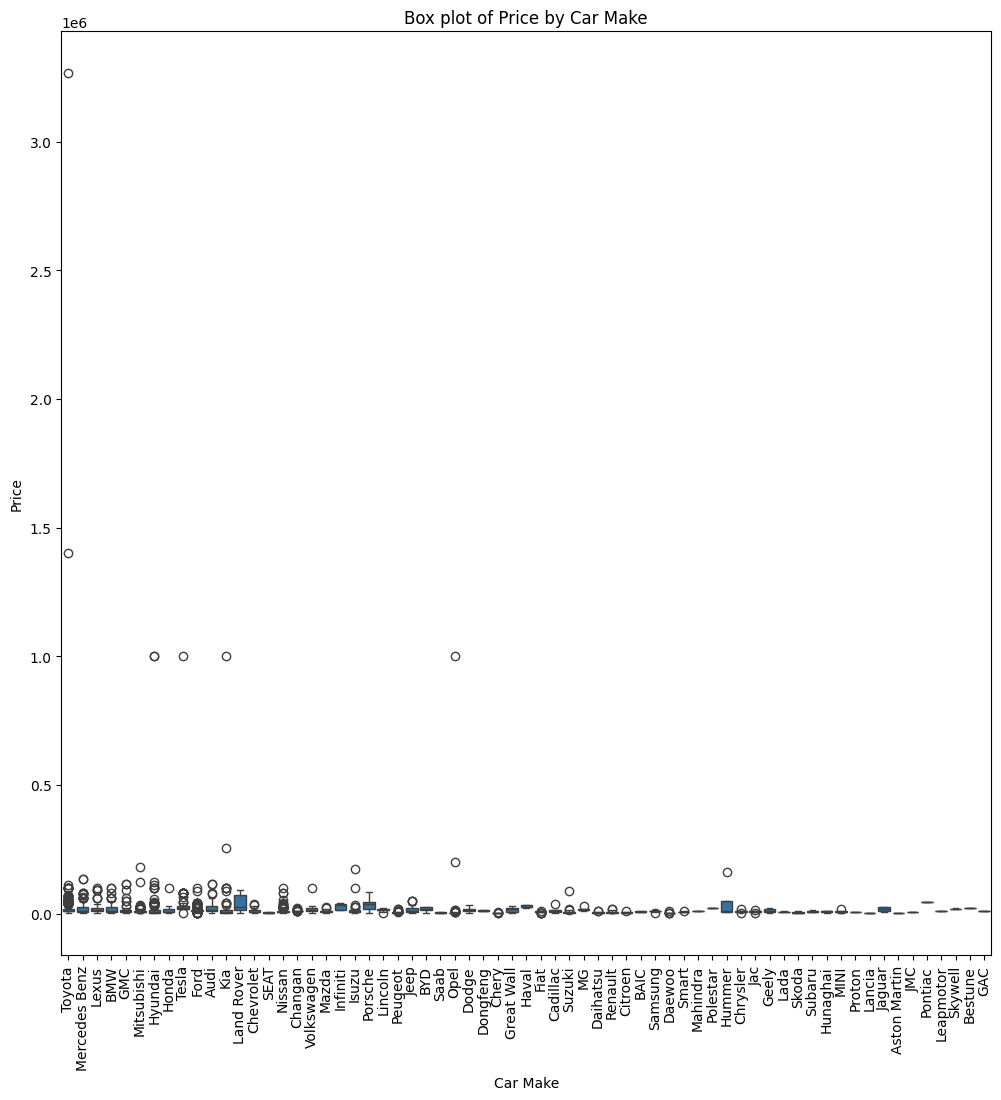

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='car_make', y='price', data=df)
plt.title('Box plot of Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

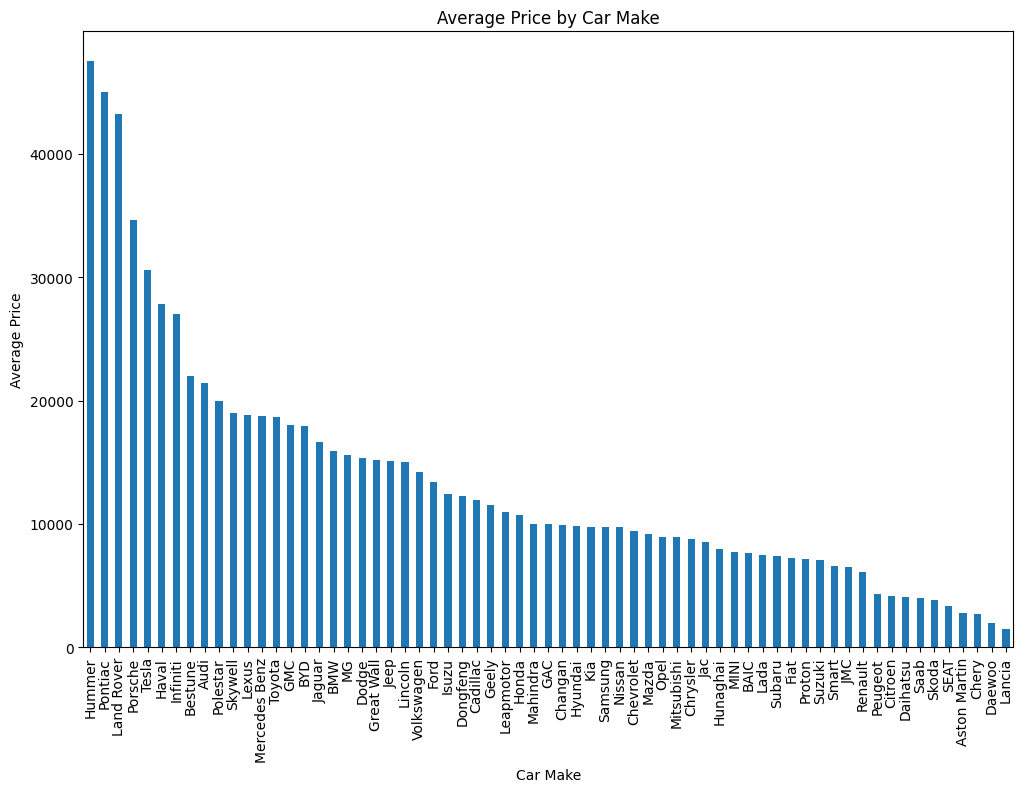

In [ ]:
plt.figure(figsize=(12, 8))
avg_price_by_make = df.groupby('car_make')['price'].mean().sort_values(ascending=False)
avg_price_by_make.plot(kind='bar')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

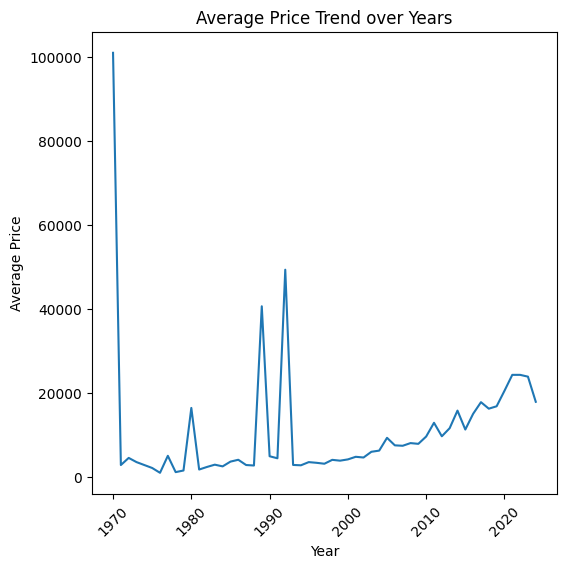

In [ ]:
# Line plot of Price Trend over Years:
plt.figure(figsize=(6, 6))
avg_price_by_year = df.groupby('year')['price'].mean()
avg_price_by_year.plot()
plt.title('Average Price Trend over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

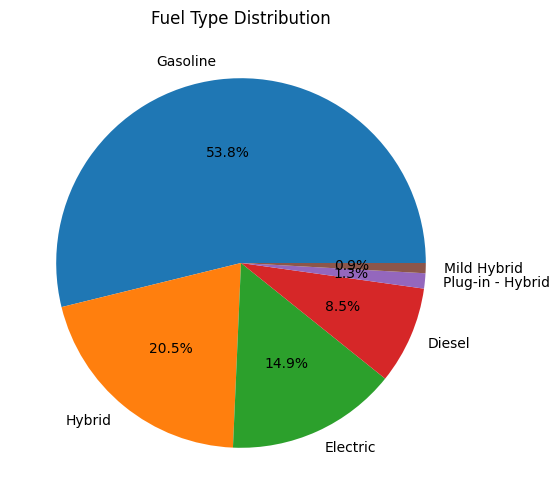

In [ ]:
# Pie chart of Fuel Type Distribution
plt.figure(figsize=(6, 6))
df['fuel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.show()

In [ ]:
df.shape

(13073, 8)

In [ ]:
# removing aston martin and pontiac cars from the dataset because jordan sooq didnt have these types of cars
df = df[(df["car_make"]!="Aston Martin")&(df["car_make"]!="Pontiac")]

In [ ]:
df.shape

(13071, 8)

## Preparing data for machine learning

In [ ]:
data = df.copy()
data.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc",17500
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",Gasoline,"1,000 - 1,999 cc",18900
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",Hybrid,"1,000 - 1,999 cc",11500
3,BMW,530,2017,Automatic,"120,000 - 129,999",Gasoline,"1,000 - 1,999 cc",31900
5,GMC,Yukon,2023,Automatic,"10,000 - 19,999",Gasoline,"More than 6,000 cc",115000


In [ ]:
columns_to_encode = ["car_make","model","transmition","kilometers","fuel","engine_size"]

In [ ]:
columns_to_normalize = ["year"]

In [ ]:
from sklearn.preprocessing import LabelEncoder


for col in columns_to_encode:
  en = LabelEncoder()
  df[col] = en.fit_transform(df[col])
df.head()

<ipython-input-173-0eb0da3a517e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = en.fit_transform(df[col])
<ipython-input-173-0eb0da3a517e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = en.fit_transform(df[col])
<ipython-input-173-0eb0da3a517e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,61,435,2021,0,17,3,1,17500
1,43,97,2013,0,12,2,1,18900
2,37,128,2012,0,8,3,1,11500
3,2,44,2017,0,6,2,1,31900
5,18,598,2023,0,3,2,12,115000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,61,435,0.944444,0,17,3,1,17500
1,43,97,0.796296,0,12,2,1,18900
2,37,128,0.777778,0,8,3,1,11500
3,2,44,0.870370,0,6,2,1,31900
5,18,598,0.981481,0,3,2,12,115000


In [ ]:
X = df.drop(["price"], axis=1)
y = df["price"]
X, y

(       car_make  model      year  transmition  kilometers  fuel  engine_size
 0            61    435  0.944444            0          17     3            1
 1            43     97  0.796296            0          12     2            1
 2            37    128  0.777778            0           8     3            1
 3             2     44  0.870370            0           6     2            1
 5            18    598  0.981481            0           3     2           12
 ...         ...    ...       ...          ...         ...   ...          ...
 14094        61    110  0.962963            0           0     1            6
 14095        22    164  0.537037            0          17     2            4
 14096        43     99  0.703704            0          12     2            1
 14097        43     99  0.907407            0          17     4            1
 14098        32    518  0.518519            1           9     2            1
 
 [13071 rows x 7 columns],
 0         17500
 1         18900
 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10456, 7), (10456,), (2615, 7), (2615,))

## Modelling before outliers removal

In [ ]:
# dictionary to append results on it
results = {

}

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model_0 = LinearRegression()
model_0.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_0 = model_0.predict(X_test)
RMSE_0 = np.sqrt(mean_squared_error(y_test, y_pred_0))

print(f"RMSE for linear Regression model is {RMSE_0:.2f}")

RMSE for linear Regression model is 28485.62


In [ ]:
# decision tree
from sklearn.tree import DecisionTreeRegressor

model_1 = DecisionTreeRegressor()
model_1.fit(X_train,y_train)

y_pred_1 = model_1.predict(X_test)
RMSE_1 = np.sqrt(mean_squared_error(y_test, y_pred_1))

print(f"RMSE for DecisionTreeRegressor model is {RMSE_1:.2f}")

RMSE for DecisionTreeRegressor model is 28538.75


In [ ]:
results["Linear Regression"] = RMSE_0.round(2)
results["decision Tree"] = RMSE_1.round(2)
results

{'Linear Regression': 28485.62, 'decision Tree': 28538.75}

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 150,
                           max_depth = 40,
                           random_state = 42)

RF.fit(X_train,y_train)

y_pred_2 = RF.predict(X_test)

RMSE_2 = np.sqrt(mean_squared_error(y_test,y_pred_2))

print(f"RMSE for Random Forest is {RMSE_2:.2f}")

RMSE for Random Forest is 29424.16


In [ ]:
results["Random Forest"] = RMSE_2.round(2)

In [ ]:
# support vector machine
from sklearn.svm import SVR

svr = SVR(kernel="rbf")
svr.fit(X_train,y_train)

y_pred_3 = svr.predict(X_test)

RMSE_3 = np.sqrt(mean_squared_error(y_test, y_pred_3))

print(f"RMSE for SVM is {RMSE_3:.2f}")

RMSE for SVM is 29383.87


In [ ]:
results["SVM"] = RMSE_3.round(2)

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred_4 = knn_regressor.predict(X_test)
RMSE_4 = mean_squared_error(y_test, y_pred_4)
print(f"RMSE for KNN is {RMSE_4:.2f}")

RMSE for KNN is 1119676852.97


In [ ]:
results["KNN"] = RMSE_4.round(2)

In [ ]:
results

{'Linear Regression': 28485.62,
 'decision Tree': 28538.75,
 'Random Forest': 29424.16,
 'SVM': 29383.87,
 'KNN': 1119676852.97}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gb_regressor.fit(X_train, y_train)
y_pred_5 = gb_regressor.predict(X_test)

RMSE_5 = np.sqrt(mean_squared_error(y_test, y_pred_5))
print(f"RMSE for GradientBoostingRegressor is : {RMSE_5:.2f}")

RMSE for GradientBoostingRegressor is : 28349.06


In [ ]:
results["GradientBoostingRegressor "] = RMSE_5.round(2)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_6 = ridge.predict(X_test)

RMSE_6 = mean_squared_error(y_test, y_pred_6)
print(f"Ridge RMSE: {RMSE_6}")

Ridge RMSE: 811455974.9051385


In [ ]:
results["Ridge"] = RMSE_6.round(2)

In [ ]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_7 = lasso.predict(X_test)
RMSE_7 = mean_squared_error(y_test, y_pred_7)
print(f"Lasso RMSE: {RMSE_7}")

Lasso RMSE: 811439302.7919343


In [ ]:
results["lasso"] = RMSE_7.round(2)

In [ ]:
results

{'Linear Regression': 28485.62,
 'decision Tree': 28538.75,
 'Random Forest': 29424.16,
 'SVM': 29383.87,
 'KNN': 1119676852.97,
 'GradientBoostingRegressor ': 28349.06,
 'Ridge': 811455974.91,
 'lasso': 811439302.79}

### After removing outliers

### Reduce number of outliers we want to remove

In [ ]:
import numpy as np

lower_percentile = np.percentile(final["price"],9)
upper_percentile = np.percentile(final["price"], 99)
lower_percentile, upper_percentile

(2500.0, 61640.00000000033)

In [ ]:
new_data = final[(final["price"] >= lower_percentile) & (final["price"] < upper_percentile)]
new_data.shape

(11847, 8)

In [ ]:
columns_to_encode = ["car_make","model","transmition","kilometers","fuel","engine_size"]
columns_to_normalize = ["year"]

In [ ]:
encoded_df = new_data.copy()

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
encoder_1 = LabelEncoder()
encoder_1.fit(new_data["car_make"])
encoder_1.classes_

array(['Aston Martin', 'Audi', 'BAIC', 'BMW', 'BYD', 'Bestune',
       'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler', 'Citroen',
       'Daewoo', 'Daihatsu', 'Dodge', 'Dongfeng', 'Fiat', 'Ford', 'GAC',
       'GMC', 'Geely', 'Great Wall', 'Haval', 'Honda', 'Hummer',
       'Hunaghai', 'Hyundai', 'Infiniti', 'Isuzu', 'JMC', 'Jac', 'Jaguar',
       'Jeep', 'Kia', 'Lada', 'Land Rover', 'Leapmotor', 'Lexus',
       'Lincoln', 'MG', 'MINI', 'Mahindra', 'Mazda', 'Mercedes Benz',
       'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Polestar', 'Pontiac',
       'Porsche', 'Proton', 'Renault', 'SEAT', 'Saab', 'Samsung', 'Skoda',
       'Skywell', 'Smart', 'Subaru', 'Suzuki', 'Tesla', 'Toyota',
       'Volkswagen'], dtype=object)

In [ ]:
encoder_2 = LabelEncoder()
encoder_2.fit(new_data["model"])
encoder_2.classes_

array(['-', '107', '133', '1500', '2', '2000GT', '2008', '206', '207',
       '208', '3', '3000GT', '300C', '300S', '301', '307', '308', '316',
       '318', '320', '323', '325', '330', '4', '4007', '407', '408',
       '4500', '4Runner', '4x4 Urban', '5', '500', '5008', '500C', '500e',
       '508', '520', '523', '525', '528', '530', '530e', '6', '607',
       '730', '735', '740', '750', '93', '95', 'A 140', 'A 200', 'A 220',
       'A113', 'A30 Sport', 'A4', 'A5', 'A6', 'A8', 'ALSVIN', 'ASX',
       'Acadia', 'Accent', 'Accord', 'Altima', 'Alto', 'Amarok', 'Armada',
       'Astra', 'Atos', 'Attrage', 'Avalon', 'Avante', 'Avanza', 'Aveo',
       'Azera', 'Azkarra', 'B 250', 'BLS', 'Baleno', 'Beetle', 'Berlingo',
       'Blazer', 'Bolt', 'Bongo', 'Bora', 'Boxer', 'Boxster S', 'C 180',
       'C 180 Coupe', 'C 200', 'C 200 Coupe', 'C 220', 'C 230', 'C 240',
       'C 250', 'C 250 Coupe', 'C 280', 'C 30', 'C 350e', 'C-HR', 'C-MAX',
       'C2', 'C3', 'C4', 'C5', 'CC', 'CLA 200', 'CLA 250

In [ ]:
encoder_3 = LabelEncoder()
encoder_3.fit(new_data["transmition"])
encoder_3.classes_

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
encoder_4 = LabelEncoder()
encoder_4.fit(new_data["kilometers"])
encoder_4.classes_

array(['0', '1 - 999', '1,000 - 9,999', '10,000 - 19,999',
       '100,000 - 109,999', '110,000 - 119,999', '120,000 - 129,999',
       '130,000 - 139,999', '140,000 - 149,999', '150,000 - 159,999',
       '160,000 - 169,999', '170,000 - 179,999', '180,000 - 189,999',
       '190,000 - 199,999', '20,000 - 29,999', '200,000',
       '30,000 - 39,999', '40,000 - 49,999', '50,000 - 59,999',
       '60,000 - 69,999', '70,000 - 79,999', '80,000 - 89,999',
       '90,000 - 99,999'], dtype=object)

In [ ]:
encoder_5 = LabelEncoder()
encoder_5.fit(new_data["fuel"])
encoder_5.classes_

array(['Diesel', 'Electric', 'Gasoline', 'Hybrid', 'Mild Hybrid',
       'Plug-in - Hybrid'], dtype=object)

In [ ]:
encoder_6 = LabelEncoder()
encoder_6.fit(new_data["engine_size"])
encoder_6.classes_

array(['0 - 499 cc', '1,000 - 1,999 cc', '2,000 - 2,999 cc',
       '3,000 - 3,999 cc', '4,000 - 4,999 cc', '5,000 - 5,999 cc',
       '50 - 69 kWh', '500 - 999 cc', '70 - 89 kWh', '90 - 99 kWh',
       'Less than 50 kWh', 'More than 100 kWh', 'More than 6,000 cc'],
      dtype=object)

In [ ]:
import joblib

joblib.dump(encoder_1,"encoder_1.pkl")
joblib.dump(encoder_2,"encoder_2.pkl")
joblib.dump(encoder_3,"encoder_3.pkl")
joblib.dump(encoder_4,"encoder_4.pkl")
joblib.dump(encoder_5,"encoder_5.pkl")
joblib.dump(encoder_6,"encoder_6.pkl")

['encoder_6.pkl']

In [ ]:
encoded_df.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc",17500
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",Gasoline,"1,000 - 1,999 cc",18900
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",Hybrid,"1,000 - 1,999 cc",11500
3,BMW,530,2017,Automatic,"120,000 - 129,999",Gasoline,"1,000 - 1,999 cc",31900
6,Mitsubishi,Pajero,2015,Automatic,"140,000 - 149,999",Gasoline,"3,000 - 3,999 cc",10250


In [ ]:
encoder.classes_

array(['0 - 499 cc', '1,000 - 1,999 cc', '2,000 - 2,999 cc',
       '3,000 - 3,999 cc', '4,000 - 4,999 cc', '5,000 - 5,999 cc',
       '50 - 69 kWh', '500 - 999 cc', '70 - 89 kWh', '90 - 99 kWh',
       'Less than 50 kWh', 'More than 100 kWh', 'More than 6,000 cc'],
      dtype=object)

In [ ]:
scaler = MinMaxScaler()

encoded_df["year"] = scaler.fit_transform(new_data[["year"]])
encoded_df.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,Toyota,Prius,0.943396,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc",17500
1,Mercedes Benz,C 180,0.792453,Automatic,"180,000 - 189,999",Gasoline,"1,000 - 1,999 cc",18900
2,Lexus,CT 200,0.773585,Automatic,"140,000 - 149,999",Hybrid,"1,000 - 1,999 cc",11500
3,BMW,530,0.867925,Automatic,"120,000 - 129,999",Gasoline,"1,000 - 1,999 cc",31900
6,Mitsubishi,Pajero,0.830189,Automatic,"140,000 - 149,999",Gasoline,"3,000 - 3,999 cc",10250


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
encoder = LabelEncoder()
for column_name in encoded_df.columns:
  if (column_name != "year") & (column_name !="price"):
    encoded_df[column_name] = encoder.fit_transform(encoded_df[column_name])

In [ ]:
encoded_df

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,62,407,0.943396,0,17,3,1,17500
1,43,88,0.792453,0,12,2,1,18900
2,37,117,0.773585,0,8,3,1,11500
3,3,40,0.867925,0,6,2,1,31900
6,44,389,0.830189,0,8,2,3,10250
...,...,...,...,...,...,...,...,...
14094,62,100,0.962264,0,0,1,6,18700
14095,23,153,0.528302,0,17,2,4,11111
14096,43,90,0.698113,0,12,2,1,12500
14097,43,90,0.905660,0,17,4,1,36000


In [ ]:
encoded_df.reset_index(drop=True, inplace=True)
encoded_df.head()

,index,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,0,62,407,0.943396,0,17,3,1,17500
1,1,43,88,0.792453,0,12,2,1,18900
2,2,37,117,0.773585,0,8,3,1,11500
3,3,3,40,0.867925,0,6,2,1,31900
4,6,44,389,0.830189,0,8,2,3,10250


In [ ]:
encoded_df.to_csv("encoded_data.csv")

### Deep Learning Modeling

In [ ]:
X = encoded_df.drop(["price"],axis=1)
y = encoded_df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9477, 7), (9477,), (2370, 7), (2370,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


base_model = RandomForestRegressor(n_estimators = 150,
                           max_depth = 40,
                           random_state = 42)
base_model.fit(X_train,y_train)
y_pred = base_model.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"RMSE is : {RMSE}")

RMSE is : 3435.1598954872957


In [ ]:
new_d = {
    'car_make': ['Toyota'],
    'model': ['Camry'],
    'year': [2022],
    'transmission': ['Automatic'],
    'kilometers': ["40,000 - 49,999"],
    'fuel': ['Hybrid'],
    'engine_size': ["1,000 - 1,999 cc"]
}

new_d = pd.DataFrame(new_d)
# for col in columns_to_encode:
#     new_d[col] = encoder.transform(new_d[col])

new_d['year'] = scaler.transform(new_d[['year']])
new_d.head()

,car_make,model,year,transmission,kilometers,fuel,engine_size
0,Toyota,Camry,0.962264,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc"


In [ ]:
new_data.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,Toyota,Prius,2021,Automatic,"40,000 - 49,999",Hybrid,"1,000 - 1,999 cc",17500
1,Mercedes Benz,C 180,2013,Automatic,"180,000 - 189,999",Gasoline,"1,000 - 1,999 cc",18900
2,Lexus,CT 200,2012,Automatic,"140,000 - 149,999",Hybrid,"1,000 - 1,999 cc",11500
3,BMW,530,2017,Automatic,"120,000 - 129,999",Gasoline,"1,000 - 1,999 cc",31900
6,Mitsubishi,Pajero,2015,Automatic,"140,000 - 149,999",Gasoline,"3,000 - 3,999 cc",10250


In [ ]:
from sklearn.preprocessing import LabelEncoder


for col in columns_to_encode:
  en = LabelEncoder()
  new_data[col] = en.fit_transform(new_data[col])
new_data.head()

<ipython-input-73-a29105a145a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = en.fit_transform(new_data[col])
<ipython-input-73-a29105a145a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[col] = en.fit_transform(new_data[col])
<ipython-input-73-a29105a145a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,62,407,2021,0,17,3,1,17500
1,43,88,2013,0,12,2,1,18900
2,37,117,2012,0,8,3,1,11500
3,3,40,2017,0,6,2,1,31900
6,44,389,2015,0,8,2,3,10250


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_data[columns_to_normalize] = scaler.fit_transform(new_data[columns_to_normalize])
new_data.head()

<ipython-input-74-421b7a7dab71>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[columns_to_normalize] = scaler.fit_transform(new_data[columns_to_normalize])


,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,62,407,0.943396,0,17,3,1,17500
1,43,88,0.792453,0,12,2,1,18900
2,37,117,0.773585,0,8,3,1,11500
3,3,40,0.867925,0,6,2,1,31900
6,44,389,0.830189,0,8,2,3,10250


In [ ]:
X = new_data.drop(["price"],axis=1)
y = new_data["price"]
X, y

(       car_make  model      year  transmition  kilometers  fuel  engine_size
 0            62    407  0.943396            0          17     3            1
 1            43     88  0.792453            0          12     2            1
 2            37    117  0.773585            0           8     3            1
 3             3     40  0.867925            0           6     2            1
 6            44    389  0.830189            0           8     2            3
 ...         ...    ...       ...          ...         ...   ...          ...
 14094        62    100  0.962264            0           0     1            6
 14095        23    153  0.528302            0          17     2            4
 14096        43     90  0.698113            0          12     2            1
 14097        43     90  0.905660            0          17     4            1
 14098        33    485  0.509434            1           9     2            1
 
 [11847 rows x 7 columns],
 0        17500
 1        18900
 2 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9477, 7), (9477,), (2370, 7), (2370,))

In [ ]:
results_3 = {}

In [ ]:
X.shape

(11847, 7)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso



# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators = 150,
                           max_depth = 40,
                           random_state = 42),
    'Decision Tree': DecisionTreeRegressor(),
    'SVM': SVR(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'Ridge':Ridge(),
    'Lasso': Lasso()

}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results_3[name] = rmse

print(results_3)

{'Linear Regression': 6591.367319640602, 'Random Forest': 3435.1598954872957, 'Decision Tree': 4458.466507289055, 'SVM': 8909.330781783443, 'KNeighborsRegressor': 5010.766954779027, 'GradientBoostingRegressor': 4011.954981579633, 'Ridge': 6591.970924384567, 'Lasso': 6591.7743380066895}


* Note : nice, I will consider Random forest regressor because it gives a RMSE value 2325 which is good.


In [ ]:
base_model = RandomForestRegressor(n_estimators = 150,
                           max_depth = 40,
                           random_state = 42)
base_model.fit(X,y)

RandomForestRegressor(max_depth=40, n_estimators=150, random_state=42)

In [ ]:
import joblib

joblib.dump(base_model, "RandomForestRegressor.pkl")

['RandomForestRegressor.pkl']

In [ ]:
joblib.dump(en, "label_encoder.pkl")

['label_encoder.pkl']

In [ ]:
joblib.dump(scaler, "MinMaxScaler.pkl")

['MinMaxScaler.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
new_data.head()

,car_make,model,year,transmition,kilometers,fuel,engine_size,price
0,61,435,0.944444,0,17,3,1,17500
1,43,97,0.796296,0,12,2,1,18900
2,37,128,0.777778,0,8,3,1,11500
3,2,44,0.870370,0,6,2,1,31900
6,44,416,0.833333,0,8,2,3,10250


In [ ]:
arr = np.array([1,2,3,4,5,6,7,8,9])
arr = arr.reshape(-1,1)
print(arr)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [ ]:
arr[0][0], arr[1][0]

(1, 2)

In [ ]:
var = new_data["car_make"].unique()
var.to_list()

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:
var

array(['Toyota', 'Mercedes Benz', 'Lexus', 'BMW', 'Mitsubishi', 'Hyundai',
       'Honda', 'Tesla', 'Ford', 'Audi', 'Kia', 'Land Rover', 'Chevrolet',
       'SEAT', 'Nissan', 'Changan', 'Volkswagen', 'Mazda', 'Infiniti',
       'Isuzu', 'Porsche', 'Lincoln', 'Peugeot', 'GMC', 'Jeep', 'BYD',
       'Saab', 'Dodge', 'Opel', 'Dongfeng', 'Great Wall', 'Haval', 'Fiat',
       'Cadillac', 'Suzuki', 'MG', 'Daihatsu', 'Renault', 'Citroen',
       'BAIC', 'Samsung', 'Daewoo', 'Smart', 'Mahindra', 'Polestar',
       'Hummer', 'Chrysler', 'Geely', 'Lada', 'Chery', 'Subaru',
       'Hunaghai', 'MINI', 'Proton', 'Jac', 'Jaguar', 'Aston Martin',
       'JMC', 'Pontiac', 'Skoda', 'Leapmotor', 'Skywell', 'Bestune',
       'GAC'], dtype=object)

In [ ]:
model = new_data["model"].unique()
model

array(['Prius', 'C 180', 'CT 200', '530', 'Pajero', 'Prius C', 'Kona',
       'E 200', 'e:NS1', 'Sonata', '3', 'Lancer', 'Fusion', 'Q8 e-tron',
       'Civic', 'Ioniq', 'Niro', 'LR4', 'Ioniq 5', 'Bolt', 'Sportage',
       'Leone', 'F-150', 'Insight', 'Leaf', 'E-Star', 'Morning', 'Porter',
       'Optima K5', 'ID.6', 'Vito', 'Avante', 'C 350e', 'QX80', 'E 350',
       'Accord', 'Verna', 'Menlo', 'bZ4X', 'E-Golf', 'X6', 'ID.4',
       'C 200 Coupe', 'Camry', 'NPR', 'D-Max', 'Jetta', 'Pegas', 'Macan',
       'K3', 'Genesis Coupe', 'MKZ', 'Corolla', '530e', 'Accent', 'e:NP1',
       'RAV 4', 'Y', 'L200', '325', 'Mustang', 'i20', 'Forte', 'C-MAX',
       'CLA 45 AMG', '308', 'ES', 'Yukon', 'Gladiator', 'Bongo',
       'Veloster', 'Focus', 'Sylphy', 'Highlander', 'Yaris', 'E2', '330',
       'C 250', 'X', 'Tucson', 'E-Bora', '95', 'EV6', 'Picanto', 'Acadia',
       'Spectra', 'E-lavida', 'Terrain', 'i3', 'Rogue', 'Malibu',
       'Tiguan', 'Ram', 'CX30', 'Captiva', 'Liberty', 'Q7', 'i10',
  

In [ ]:
kilo = new_data["kilometers"].unique()
kilo

array(['40,000 - 49,999', '180,000 - 189,999', '140,000 - 149,999',
       '120,000 - 129,999', '110,000 - 119,999', '20,000 - 29,999',
       '90,000 - 99,999', '0', '200,000', '10,000 - 19,999',
       '50,000 - 59,999', '30,000 - 39,999', '1,000 - 9,999',
       '170,000 - 179,999', '80,000 - 89,999', '70,000 - 79,999',
       '100,000 - 109,999', '60,000 - 69,999', '150,000 - 159,999',
       '130,000 - 139,999', '190,000 - 199,999', '1 - 999',
       '160,000 - 169,999'], dtype=object)

In [ ]:
fuel = new_data["fuel"].unique()
fuel

array(['Hybrid', 'Gasoline', 'Electric', 'Plug-in - Hybrid', 'Diesel',
       'Mild Hybrid'], dtype=object)

In [ ]:
engine = new_data["engine_size"].unique()
engine

array(['1,000 - 1,999 cc', '3,000 - 3,999 cc', '50 - 69 kWh',
       '2,000 - 2,999 cc', '90 - 99 kWh', '70 - 89 kWh',
       '4,000 - 4,999 cc', 'Less than 50 kWh', '5,000 - 5,999 cc',
       'More than 100 kWh', '500 - 999 cc', '0 - 499 cc',
       'More than 6,000 cc'], dtype=object)

In [ ]:
l1 = new_data["year"].unique()
np.sort(l1)

array([1971, 1972, 1973, 1975, 1977, 1980, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 2024], dtype=object)

In [ ]:
len(new_data["car_make"].unique())

64

In [ ]:
len(new_data["model"].unique())

579